In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pwd

'/content/drive/My Drive/ECE271B_project'

In [ ]:
cd /content/drive/MyDrive/ECE271B_project/

/content/drive/MyDrive/ECE271B_project


In [ ]:
import os
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms
from modules import train_model, test_model
from dataset import MIMICDataset
from torch import optim
from torch.optim import lr_scheduler
from datetime import datetime
import pandas as pd
from backbone_models import ResNet18, VGG16, shallowResNet, shallowResNet2,ResNet3, FCNet, Conv3Net
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch.utils.data as data

In [ ]:
##Dataset paths from part1 to part4
'''data_path=['/Users/yeseullee/Documents/ECE271B/MIMICii/part1',
'/Users/yeseullee/Documents/ECE271B/MIMICii/part2',
'/Users/yeseullee/Documents/ECE271B/MIMICii/part3',
'/Users/yeseullee/Documents/ECE271B/MIMICii/part4']

label_path=['/Users/yeseullee/Documents/ECE271B/MIMICii/part1/label1.csv',
'/Users/yeseullee/Documents/ECE271B/MIMICii/part2/label2.csv',
'/Users/yeseullee/Documents/ECE271B/MIMICii/part3/label3.csv',
'/Users/yeseullee/Documents/ECE271B/MIMICii/part4/label4.csv']'''
data_path='/content/drive/MyDrive/ECE271B_project/MIMICii/dataset_NT_HT.pt'
label_path='/content/drive/MyDrive/ECE271B_project/MIMICii/label_NT_HT.pt'
subject_path='/content/drive/MyDrive/ECE271B_project/MIMICii/subjectid_NT_HT.txt'

In [ ]:
data_mean=1.59
data_std=0.73
data_normalization = {'mean':data_mean,'std':data_std}

# setup data loader
dataset = MIMICDataset(data_path, label_path, subject_path, normalize=data_normalization,preprocessing=False, choose_class=[0,2])
dataset_size=dataset.__len__()
print('dataset: {}'.format(dataset.__len__()))

dataset: 366395


In [ ]:
training_size=int(dataset_size*0.64)
test_size=int(dataset_size*0.2)
val_size=dataset_size-training_size-test_size

In [ ]:
# Split training data, validation data, testing data
data_train, data_val, data_test = torch.utils.data.random_split(dataset, [training_size, val_size, test_size])
print(data_train.__len__())
print(data_val.__len__())
print(data_test.__len__())

234492
58624
73279


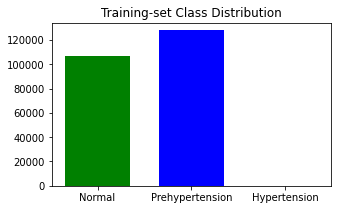

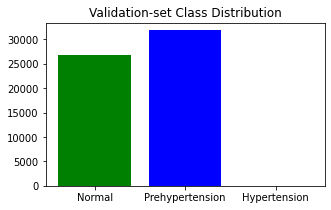

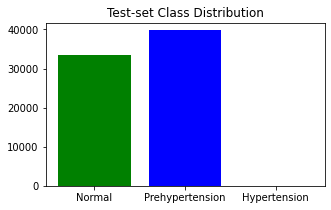

In [ ]:
temp_dataloaders={'train': torch.utils.data.DataLoader(data_train,batch_size=1,shuffle=False),
                'val':torch.utils.data.DataLoader(data_val,batch_size=1,shuffle=False),
                'test':torch.utils.data.DataLoader(data_test,batch_size=1,shuffle=False)}

train_labels=[0,0,0]
for data, label, subject in temp_dataloaders['train']:
    if label.data==0:
        train_labels[0]+=1
    elif label.data==1:
        train_labels[1]+=1
    else:
        train_labels[2]+=1

plt.figure(figsize=(5,3))
plt.bar(np.arange(3),train_labels,color=['g','b','r'],width=0.7)
plt.xticks(np.arange(3),['Normal','Prehypertension','Hypertension'])
plt.title('Training-set Class Distribution')
plt.show()

val_labels=[0,0,0]
for data, label, subject in temp_dataloaders['val']:
    if label.data==0:
        val_labels[0]+=1
    elif label.data==1:
        val_labels[1]+=1
    else:
        val_labels[2]+=1

plt.figure(figsize=(5,3))
plt.bar(np.arange(3),val_labels,color=['g','b','r'])
plt.xticks(np.arange(3),['Normal','Prehypertension','Hypertension'])
plt.title('Validation-set Class Distribution')
plt.show()

test_labels=[0,0,0]
for data, label, subject in temp_dataloaders['test']:
    if label.data==0:
        test_labels[0]+=1
    elif label.data==1:
        test_labels[1]+=1
    else:
        test_labels[2]+=1

plt.figure(figsize=(5,3))
plt.bar(np.arange(3),test_labels,color=['g','b','r'])
plt.xticks(np.arange(3),['Normal','Prehypertension','Hypertension'])
plt.title('Test-set Class Distribution')
plt.show()

In [ ]:
dataloaders={'train': torch.utils.data.DataLoader(data_train,batch_size=32,shuffle=True),
                'val':torch.utils.data.DataLoader(data_val,batch_size=32,shuffle=True),
                'test':torch.utils.data.DataLoader(data_test,batch_size=32,shuffle=False)}
dataset_sizes = {'train': data_train.__len__(),
                    'val':data_val.__len__(),
                    'test':data_test.__len__()}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print('Device:',device)

Device: cuda


In [ ]:
model=Conv3Net(2)
model=model.to(device)

In [ ]:
learning_rate=0.001
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=0.0005)
#optimizer = optim.Adam(model.parameters(), lr=learning_rate) #weight_decay=0.01
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)
#exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.2)
trained_model,trained_model_later=train_model(model, criterion, optimizer, exp_lr_scheduler, dataloaders, dataset_sizes, device, num_epochs=150)

Epoch 0/149
----------
train Loss: 0.5845 Acc: 0.6801
val Loss: 0.5542 Acc: 0.7270

Epoch 1/149
----------
train Loss: 0.5059 Acc: 0.7474
val Loss: 0.4644 Acc: 0.7730

Epoch 2/149
----------
train Loss: 0.4711 Acc: 0.7689
val Loss: 0.4484 Acc: 0.7822

Epoch 3/149
----------
train Loss: 0.4511 Acc: 0.7821
val Loss: 0.4618 Acc: 0.7744

Epoch 4/149
----------
train Loss: 0.4351 Acc: 0.7918
val Loss: 0.4144 Acc: 0.7986

Epoch 5/149
----------
train Loss: 0.4223 Acc: 0.7990
val Loss: 0.4115 Acc: 0.8043

Epoch 6/149
----------
train Loss: 0.4142 Acc: 0.8038
val Loss: 0.4124 Acc: 0.8028

Epoch 7/149
----------
train Loss: 0.4083 Acc: 0.8082
val Loss: 0.3967 Acc: 0.8157

Epoch 8/149
----------
train Loss: 0.4023 Acc: 0.8115
val Loss: 0.4057 Acc: 0.8096

Epoch 9/149
----------
train Loss: 0.3978 Acc: 0.8141
val Loss: 0.3844 Acc: 0.8203

Epoch 10/149
----------
train Loss: 0.3936 Acc: 0.8163
val Loss: 0.4058 Acc: 0.8130

Epoch 11/149
----------
train Loss: 0.3888 Acc: 0.8195
val Loss: 0.4120 Acc

In [ ]:
from sklearn.metrics import confusion_matrix

def test_model(model,dataloaders,dataset_size,classes,device):
    
    model=model.to(device)
    model.eval()
    corrects=0
    CM=0
    with torch.no_grad():
        for data in dataloaders['test']:
            images, labels, subject= data
            images = images.to(device)
            labels = labels.to(device)
            
            outputs = model(images) 
            preds = torch.argmax(outputs.data, 1)

            cm_tmp=confusion_matrix(labels.tolist(), preds.tolist(),labels=classes)
            CM+=cm_tmp
            
            corrects += torch.sum(preds == labels.data)
        tn=CM[0][0]
        tp=CM[1][1]
        fp=CM[0][1]
        fn=CM[1][0]
        
        sensitivity=tp/(tp+fn)
        precision=tp/(tp+fp)    
        acc=corrects.double() / dataset_size
        
        print('\nTestset Accuracy(mean): %f %%' % (100 * acc))
        print('Confusion Matrix: ')
        print(CM)
        print('- Sensitivity : ',(tp/(tp+fn))*100)
        print('- Specificity : ',(tn/(tn+fp))*100)
        print('- Precision: ',(tp/(tp+fp))*100)
        print('- NPV: ',(tn/(tn+fn))*100)
        print('- F1 : ',((2*sensitivity*precision)/(sensitivity+precision))*100)
                
    return acc, CM

device_cpu=torch.device('cpu')

print('- model')
acc1,cm1=test_model(trained_model,dataloaders,dataset_sizes['test'],classes=[0,1], device=device_cpu)

print('- model_later')
acc2,cm2=test_model(trained_model_later,dataloaders,dataset_sizes['test'],classes=[0,1], device=device_cpu)

In [ ]:
model_path='/content/drive/MyDrive/ECE271B_project/models/'
model_name='shallowPPG_MIMIC[0,2]_'
torch.save(trained_model.state_dict(),model_path+model_name+datetime.today().strftime('%m-%d-%H:%M')+'.pt')